In [13]:

import json
import numpy as np
import pandas as pd
from pathlib import Path
import os
import sys
import warnings

warnings.simplefilter('ignore')

sys.path.append('../../utilities')
sys.path.append('../../models/grt123')
sys.path.append('../../models/grt123/training')
sys.path.append('../../models/grt123/preprocessing/')

# from layers import nms,iou
from summit_utils import *
from evaluation import noduleCADEvaluation

workspace_path = Path(os.getcwd()).parent.parent

LUNA_SERIES_PATH = Path(f'{workspace_path}/data/LUNA/metadata/seriesuids.csv')
LUNA_POSITIVE_ONLY_SERIES_PATH = Path(f'{workspace_path}/data/LUNA/metadata/positive_only_seriesuids.csv')

LUNA_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/LUNA/metadata/annotations.csv')
LUNA_GT4_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/LUNA/metadata/annotations_gt4.csv')

LUNA_EXCLUSIONS_PATH = Path(f'{workspace_path}/data/LUNA/metadata/annotations_excluded.csv')
LUNA_EXCLUSIONS_PATH_EMPTY = Path(f'{workspace_path}/data/LUNA/metadata/annotations_excluded_empty.csv')

LUNA_GRT_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/LUNA/metadata/grt123_annotations.csv')
LUNA_GRT_GT4_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/LUNA/metadata/grt123_annotations_gt4.csv')

LUNA_GRT_EXCLUSIONS_PATH = Path(f'{workspace_path}/data/LUNA/metadata/grt123_annotations_excluded.csv')
LUNA_GRT_EXCLUSIONS_EMPTY_PATH = Path(f'{workspace_path}/data/LUNA/metadata/grt123_annotations_excluded_empty.csv')

SUMMIT_SERIES_PATH = Path(f'{workspace_path}/data/summit/metadata/seriesuids.csv')

SUMMIT_GRT_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/summit/metadata/grt123_annotations.csv')
SUMMIT_GRT_GT4_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/summit/metadata/grt123_annotations_gt4.csv')

SUMMIT_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/summit/metadata/annotations.csv')
SUMMIT_GT4_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/summit/metadata/annotations_gt4.csv')

SUMMIT_GRT_EXCLUSIONS_EMPTY_PATH = Path(f'{workspace_path}/data/LUNA/metadata/grt123_annotations_excluded_empty.csv')
SUMMIT_EXCLUSIONS_EMPTY_PATH = Path(f'{workspace_path}/data/LUNA/metadata/grt123_annotations_excluded_empty.csv')

def caluclate_cpm_from_bootstrapping(file_path):
    metrics = pd.read_csv(file_path)

    fps = metrics['FPrate']
    mean_sens = metrics['Sensivity[Mean]']
    low_mean_sens = metrics['Sensivity[Lower bound]']
    high_mean_sens = metrics['Sensivity[Upper bound]']

    idxs = []
    for fps_value in [0.125, 0.25, 0.5, 1, 2, 4, 8]:
        idxs.append(np.abs(fps - fps_value).argmin())
        
    fps = fps[idxs]
    mean_sens = mean_sens[idxs]
    low_sens = low_mean_sens[idxs]
    high_sens = high_mean_sens[idxs]

    
    df = pd.DataFrame({'fps': fps, 'mean_sens': mean_sens, 'low_sens': low_sens, 'high_sens': high_sens}).apply(lambda x: np.round(x,2))
    mean_cpm = df['mean_sens'].mean()
    low_cpm = df['low_sens'].mean()
    high_cpm = df['high_sens'].mean()

    display(df)
    print('Mean Sensitivity:', np.round(mean_cpm,2), 'Low Sensitivity:', np.round(low_cpm,2), 'High Sensitivity:', np.round(high_cpm,2))

def show_metrics(file_path):
    metrics = pd.read_csv(file_path, skiprows=6, sep=':').rename(columns={0:'Metric',1:'Value'}).round(3)
    display(metrics)

# GRT 123 - Trained LUNA Evaluated on LUNA

NOTE: As this is replicating SUMMIT training and evaluation of nodules >= 4mm only

/Users/john/Projects/SOTAEvaluationNoduleDetection/data/LUNA/metadata/grt123_annotations_gt4.csv
Total number of included nodule annotations: 1137
Total number of nodule annotations: 1137
Cases: 888


100%|██████████| 1000/1000 [00:26<00:00, 37.30it/s]


,fps,mean_sens,low_sens,high_sens
0,0.12,0.40,0.34,0.46
159,0.25,0.55,0.51,0.59
476,0.50,0.68,0.65,0.72
1111,1.00,0.79,0.76,0.81
2381,2.00,0.87,0.85,0.90
4920,4.00,0.91,0.89,0.93
9999,8.00,0.94,0.93,0.96


Mean Sensitivity: 0.73 Low Sensitivity: 0.7 High Sensitivity: 0.77


,True positives,1091
0,False positives,16635.000
1,False negatives,46.000
2,True negatives,0.000
3,Total number of candidates,17739.000
4,Total number of nodules,1137.000
5,Ignored candidates on excluded nodules,0.000
6,Ignored candidates which were double detec...,13.000
7,Sensitivity,0.960
8,Average number of candidates per scan,19.976


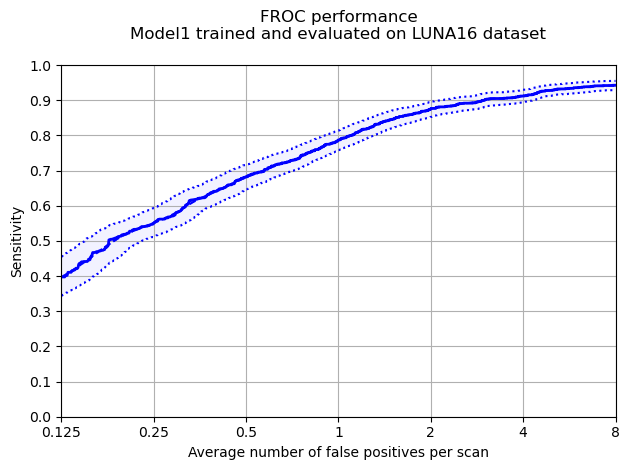

In [14]:
grt123_luna_luna = noduleCADEvaluation(
    annotations_filename=LUNA_GRT_GT4_ANNOTATIONS_PATH,
    annotations_excluded_filename=LUNA_EXCLUSIONS_PATH_EMPTY,
    seriesuids_filename=LUNA_SERIES_PATH,
    results_filename=f"{workspace_path}/models/grt123/bbox_result/trained_luna/luna/10folds/10folds_predictions.csv",    
    filter='\nModel1 trained and evaluated on LUNA16 dataset\n',
    outputDir=f'{workspace_path}/results/grt123/trained_luna/luna/10folds_with_exclusions',
)
caluclate_cpm_from_bootstrapping(f'{workspace_path}/results/grt123/trained_luna/luna/10folds_with_exclusions/froc_10folds_predictions_bootstrapping.csv')
show_metrics(f'{workspace_path}/results/grt123/trained_luna/luna/10folds_with_exclusions/CADAnalysis.txt')

# GRT 123 Trained LUNA Evaluated on SUMMIT

/Users/john/Projects/SOTAEvaluationNoduleDetection/data/summit/metadata/grt123_annotations_gt4.csv
Total number of included nodule annotations: 993
Total number of nodule annotations: 993
Cases: 797


100%|██████████| 1000/1000 [00:33<00:00, 29.82it/s]


,fps,mean_sens,low_sens,high_sens
0,0.12,0.08,0.05,0.11
159,0.25,0.15,0.12,0.20
476,0.50,0.29,0.25,0.33
1111,1.00,0.41,0.37,0.46
2381,2.00,0.53,0.49,0.57
4920,4.00,0.61,0.58,0.64
9999,8.00,0.67,0.64,0.70


Mean Sensitivity: 0.39 Low Sensitivity: 0.36 High Sensitivity: 0.43


,True positives,725
0,False positives,23065.000
1,False negatives,268.000
2,True negatives,0.000
3,Total number of candidates,23794.000
4,Total number of nodules,993.000
5,Ignored candidates on excluded nodules,0.000
6,Ignored candidates which were double detec...,4.000
7,Sensitivity,0.730
8,Average number of candidates per scan,29.854


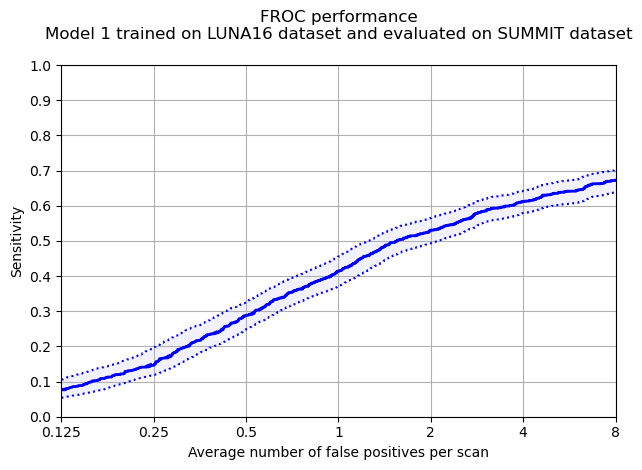

In [15]:
grt123_luna_summit = noduleCADEvaluation(
    annotations_filename=SUMMIT_GRT_GT4_ANNOTATIONS_PATH,
    annotations_excluded_filename=SUMMIT_GRT_EXCLUSIONS_EMPTY_PATH,
    seriesuids_filename=SUMMIT_SERIES_PATH,
    results_filename=f"{workspace_path}/models/grt123/bbox_result/trained_luna/summit/partial/10folds/10folds_predictions.csv",    
    filter='\nModel 1 trained on LUNA16 dataset and evaluated on SUMMIT dataset\n',
    outputDir=f'{workspace_path}/results/grt123/trained_luna/summit/partial/10folds',
)
caluclate_cpm_from_bootstrapping(f'{workspace_path}/results/grt123/trained_luna/summit/partial/10folds/froc_10folds_predictions_bootstrapping.csv')
show_metrics(f'{workspace_path}/results/grt123/trained_luna/summit/partial/10folds/CADAnalysis.txt')

# Detection - Trained LUNA Evaluated LUNA

In [4]:
def combine_predictions(predictions_json_path, dataset_name, use_nms=True):
    """
    Get predictions from a json file

    Args:
    predictions_json_path: str, path to the json file

    Returns:
    images: list of str, list of image names
    predictions: pd.DataFrame, dataframe of predictions
    
    """
    predictions_json_path = Path(predictions_json_path)

    predictions_list = []

    for prediction_json_path in predictions_json_path.glob('*json'):
        
        print(prediction_json_path)

        with open(prediction_json_path,'r') as f:
            predictions_json = json.load(f)

        idx = 0
        for image_cnt, image in enumerate(predictions_json[dataset_name]):
            name = image['image'].split('/')[-1][:-7]
            
            image_predictions_dict = {}
            for box, score in zip(image['box'], image['score']):
                prediction = {}
                prediction['threshold'] = score
                prediction['index'] = box[2]
                prediction['col'] = box[1]
                prediction['row'] = box[0]
                prediction['diameter'] = np.max(box[3:])
                prediction['name'] = name

                image_predictions_dict[idx] = prediction
                idx+=1
            
            image_predictions = pd.DataFrame.from_dict(image_predictions_dict, orient='index')
            predictions_list.append(image_predictions)

    predictions = pd.concat(predictions_list, ignore_index=True)
    predictions.to_csv(predictions_json_path / 'predictions.csv', index=False)

    return predictions_json_path / 'predictions.csv'


/Users/john/Projects/SOTAEvaluationNoduleDetection/models/detection/result/trained_luna/luna/10folds/result_fold9.json
/Users/john/Projects/SOTAEvaluationNoduleDetection/models/detection/result/trained_luna/luna/10folds/result_fold5.json
/Users/john/Projects/SOTAEvaluationNoduleDetection/models/detection/result/trained_luna/luna/10folds/result_fold4.json
/Users/john/Projects/SOTAEvaluationNoduleDetection/models/detection/result/trained_luna/luna/10folds/result_fold8.json
/Users/john/Projects/SOTAEvaluationNoduleDetection/models/detection/result/trained_luna/luna/10folds/result_fold3.json
/Users/john/Projects/SOTAEvaluationNoduleDetection/models/detection/result/trained_luna/luna/10folds/result_fold2.json
/Users/john/Projects/SOTAEvaluationNoduleDetection/models/detection/result/trained_luna/luna/10folds/result_fold1.json
/Users/john/Projects/SOTAEvaluationNoduleDetection/models/detection/result/trained_luna/luna/10folds/result_fold0.json
/Users/john/Projects/SOTAEvaluationNoduleDetecti

100%|██████████| 1000/1000 [00:27<00:00, 36.84it/s]


,fps,mean_sens,low_sens,high_sens
0,0.12,0.49,0.43,0.54
159,0.25,0.61,0.57,0.66
476,0.50,0.76,0.72,0.79
1111,1.00,0.85,0.83,0.87
2381,2.00,0.92,0.90,0.94
4920,4.00,0.97,0.95,0.98
9999,8.00,0.98,0.97,0.99


Mean Sensitivity: 0.8 Low Sensitivity: 0.77 High Sensitivity: 0.82


,True positives,1126
0,False positives,17678.00
1,False negatives,11.00
2,True negatives,0.00
3,Total number of candidates,18870.00
4,Total number of nodules,1137.00
5,Ignored candidates on excluded nodules,0.00
6,Ignored candidates which were double detec...,66.00
7,Sensitivity,0.99
8,Average number of candidates per scan,21.25


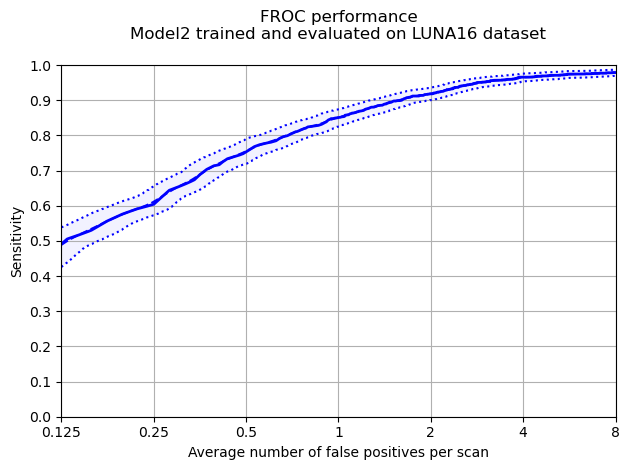

In [16]:

predictions_filepath = combine_predictions(f"{workspace_path}/models/detection/result/trained_luna/luna/10folds","validation")

detection_luna_luna = noduleCADEvaluation(
    annotations_filename=LUNA_GT4_ANNOTATIONS_PATH,
    annotations_excluded_filename=LUNA_EXCLUSIONS_PATH_EMPTY,
    seriesuids_filename=LUNA_SERIES_PATH,
    results_filename=predictions_filepath,    
    filter='\nModel2 trained and evaluated on LUNA16 dataset\n',
    outputDir=f"{workspace_path}/results/detection/trained_luna/luna/10folds",
)
caluclate_cpm_from_bootstrapping(f"{workspace_path}/results/detection/trained_luna/luna/10folds/froc_predictions_bootstrapping.csv")
show_metrics(f"{workspace_path}/results/detection/trained_luna/luna/10folds/CADAnalysis.txt")

# Detection - Trained LUNA evaluated on SUMMIT

/Users/john/Projects/SOTAEvaluationNoduleDetection/models/detection/result/trained_luna/summit/partial/10folds/result_10folds.json
/Users/john/Projects/SOTAEvaluationNoduleDetection/data/summit/metadata/annotations_gt4.csv
Total number of included nodule annotations: 993
Total number of nodule annotations: 993
Cases: 797
This is strange: CAD mark None detected two nodules! Check for overlapping nodule annotations, SeriesUID: summit-4336-nex_Y0_BASELINE_A, nodule Annot ID: None


100%|██████████| 1000/1000 [00:30<00:00, 32.82it/s]


,fps,mean_sens,low_sens,high_sens
0,0.12,0.15,0.11,0.18
159,0.25,0.25,0.21,0.30
476,0.50,0.38,0.34,0.43
1111,1.00,0.53,0.49,0.57
2381,2.00,0.66,0.63,0.70
4920,4.00,0.77,0.74,0.80
9999,8.00,0.86,0.83,0.88


Mean Sensitivity: 0.51 Low Sensitivity: 0.48 High Sensitivity: 0.55


,True positives,918
0,False positives,20162.000
1,False negatives,75.000
2,True negatives,0.000
3,Total number of candidates,21281.000
4,Total number of nodules,993.000
5,Ignored candidates on excluded nodules,0.000
6,Ignored candidates which were double detec...,202.000
7,Sensitivity,0.924
8,Average number of candidates per scan,26.701


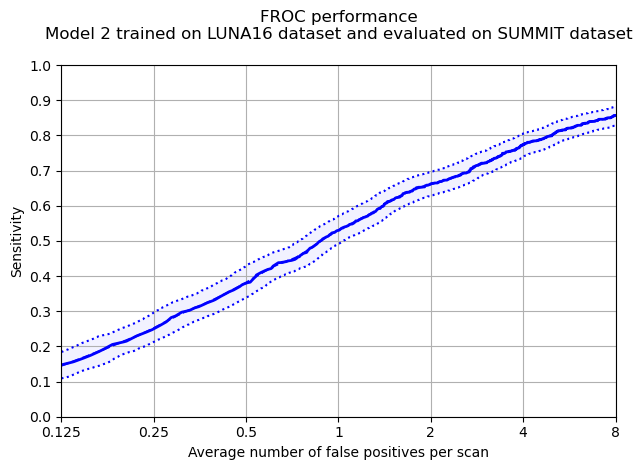

In [17]:
predictions_filepath = combine_predictions(f"{workspace_path}/models/detection/result/trained_luna/summit/partial/10folds","test")

detection_luna_summit = noduleCADEvaluation(
    annotations_filename=SUMMIT_GT4_ANNOTATIONS_PATH,
    annotations_excluded_filename=SUMMIT_EXCLUSIONS_EMPTY_PATH,
    seriesuids_filename=SUMMIT_SERIES_PATH,
    results_filename=predictions_filepath,    
    filter='\nModel 2 trained on LUNA16 dataset and evaluated on SUMMIT dataset\n',
    outputDir=f"{workspace_path}/results/detection/trained_luna/summit/10folds"
)
caluclate_cpm_from_bootstrapping(f"{workspace_path}/results/detection/trained_luna/summit/10folds/froc_predictions_bootstrapping.csv")
show_metrics(f"{workspace_path}/results/detection/trained_luna/summit/10folds/CADAnalysis.txt")

# Miss Analysis at 2 FPPS



False Positives Operating Points: [0.125, 0.25, 0.5, 1, 2, 4, 8]
False Positives per Scan: [0.12923462986198245, 0.25094102885821834, 0.49937264742785453, 1.001254705144291, 1.9899623588456716, 3.981179422835634, 7.997490589711417]
Sensitivity: [0.07653575025176233, 0.14602215508559918, 0.28700906344410876, 0.4138972809667673, 0.5297079556898288, 0.6112789526686808, 0.6717019133937563]
Threshold: [7.921692, 7.088497, 6.3770237, 5.703738, 4.8095226, 3.3172078, 0.9918976]
/Users/john/Projects/SOTAEvaluationNoduleDetection/data/summit/metadata/grt123_annotations_gt4.csv
Total number of included nodule annotations: 993
Total number of nodule annotations: 993
Cases: 797


100%|██████████| 1000/1000 [00:04<00:00, 208.14it/s]


Missed metadata:993, Required misses: 467


(993, 46)

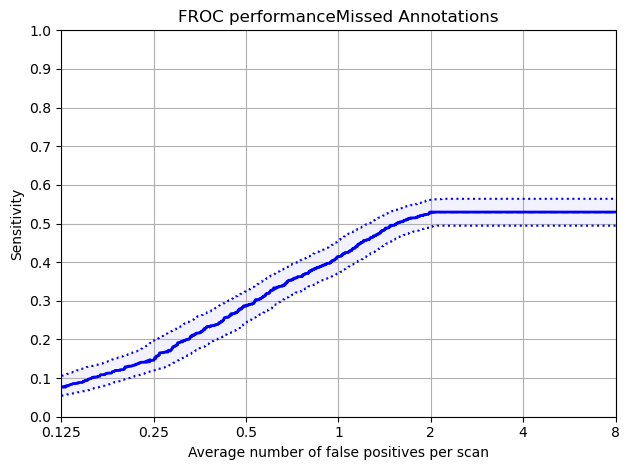

In [7]:
from tempfile import TemporaryDirectory

def get_grt_missed_annotations(analysis_data, predictions_path, operating_point=2):
    fps = analysis_data[0]
    sens = analysis_data[1]
    threshold = analysis_data[2]

    operating_points = [0.125, 0.25, 0.5, 1, 2, 4, 8]

    idxs = []
    fps_values = []
    sens_values = []
    thresh_values = []
    for fpps in operating_points:

        idx = np.abs(fps - fpps).argmin()
        idxs.append(idx)
        fps_values.append(fps[idx])
        sens_values.append(sens[idx])
        thresh_values.append(threshold[idx])

    print('False Positives Operating Points:', operating_points)
    print('False Positives per Scan:', fps_values)
    print('Sensitivity:', sens_values)
    print('Threshold:', thresh_values)

    predictions = pd.read_csv(predictions_path)
    predictions_at_operating_point = predictions[predictions.threshold > thresh_values[operating_points.index(operating_point)]]

    with TemporaryDirectory() as temp_dir:
        predictions_at_operating_point.to_csv(f'{temp_dir}/predictions.csv', index=False)
        missed_annotations = noduleCADEvaluation(
            annotations_filename=SUMMIT_GRT_GT4_ANNOTATIONS_PATH,
            annotations_excluded_filename=SUMMIT_GRT_EXCLUSIONS_EMPTY_PATH,
            seriesuids_filename=SUMMIT_SERIES_PATH,
            results_filename=f'{temp_dir}/predictions.csv',
            filter='Missed Annotations',
            outputDir=f'{temp_dir}/results'
        )

        misses = pd.read_csv(f'{temp_dir}/results/nodulesWithoutCandidate_predictions.txt', header=None).rename(columns={
            0 : 'name',
            1 : 'id',
            2 : 'col',
            3 : 'row',
            4 : 'index',
            5 : 'diameter'
        }).assign(miss=True)
        
        lnk_annotations = (
            pd.read_csv('/Users/john/Projects/SOTAEvaluationNoduleDetection/data/summit/metadata/grt123_annotations_gt4.csv')
        )

        test_annotations = (
            pd.read_csv('/Users/john/Projects/SOTAEvaluationNoduleDetection/metadata/summit/partial/test_metadata.csv')
        ).assign(name=lambda x: x.participant_id + '_' + 'Y0_BASELINE_A')

        test_annotations = test_annotations[test_annotations.nodule_diameter_mm >= 4]

        missed_metadata = pd.merge(misses, lnk_annotations, left_on=[
            'name',
            'row',
            'col',
            'index',
            'diameter'
        ], right_on=[
            'name',
            'row',
            'col',
            'index',
            'diameter'
        ]).merge(
            test_annotations,
            left_on=[
                'name',
                'nodule_x_coordinate',
                'nodule_y_coordinate',
                'nodule_z_coordinate',
                'nodule_diameter_mm'
            ],
            right_on=[
                'name',
                'nodule_x_coordinate',
                'nodule_y_coordinate',
                'nodule_z_coordinate',
                'nodule_diameter_mm'
            ],
            how='right'
        )

        missed_metadata.miss.fillna(False, inplace=True)

        print(f'Missed metadata:{missed_metadata.shape[0]}, Required misses: {misses.shape[0]}')

        return missed_metadata

grt123_misses = get_grt_missed_annotations(grt123_luna_summit, f"{workspace_path}/models/grt123/bbox_result/trained_luna/summit/partial/10folds/10folds_predictions.csv", 2)
grt123_misses.shape

False Positives Operating Points: [0.125, 0.25, 0.5, 1, 2, 4, 8]
False Positives per Scan: [0.12296110414052698, 0.24592220828105396, 0.5018820577164367, 0.998745294855709, 1.998745294855709, 3.9987452948557087, 8.003764115432872]
Sensitivity: [0.14602215508559918, 0.2467270896273917, 0.3806646525679758, 0.5297079556898288, 0.6626384692849949, 0.7744209466263847, 0.8569989929506546]
Threshold: [0.99609375, 0.9921875, 0.98193359375, 0.95458984375, 0.86669921875, 0.6181640625, 0.2210693359375]
/Users/john/Projects/SOTAEvaluationNoduleDetection/data/summit/metadata/annotations_gt4.csv
Total number of included nodule annotations: 993
Total number of nodule annotations: 993
Cases: 797


100%|██████████| 1000/1000 [00:04<00:00, 214.19it/s]


Missed metadata:993, Required misses: 336


(993, 45)

False    657
True     336
Name: miss, dtype: int64

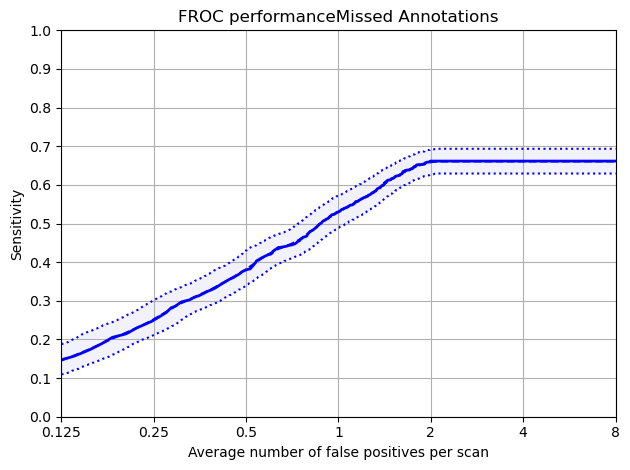

In [8]:

def get_detection_missed_annotations(analysis_data, predictions_path, operating_point=2):
    fps = analysis_data[0]
    sens = analysis_data[1]
    threshold = analysis_data[2]

    operating_points = [0.125, 0.25, 0.5, 1, 2, 4, 8]

    idxs = []
    fps_values = []
    sens_values = []
    thresh_values = []
    for fpps in operating_points:

        idx = np.abs(fps - fpps).argmin()
        idxs.append(idx)
        fps_values.append(fps[idx])
        sens_values.append(sens[idx])
        thresh_values.append(threshold[idx])

    print('False Positives Operating Points:', operating_points)
    print('False Positives per Scan:', fps_values)
    print('Sensitivity:', sens_values)
    print('Threshold:', thresh_values)

    predictions = pd.read_csv(predictions_path)
    predictions_at_operating_point = predictions[predictions.threshold > thresh_values[operating_points.index(operating_point)]]

    with TemporaryDirectory() as temp_dir:
        predictions_at_operating_point.to_csv(f'{temp_dir}/predictions.csv', index=False)
        missed_annotations = noduleCADEvaluation(
            annotations_filename=SUMMIT_GT4_ANNOTATIONS_PATH,
            annotations_excluded_filename=SUMMIT_EXCLUSIONS_EMPTY_PATH,
            seriesuids_filename=SUMMIT_SERIES_PATH,
            results_filename=f'{temp_dir}/predictions.csv',
            filter='Missed Annotations',
            outputDir=f'{temp_dir}/results'
        )

        misses = pd.read_csv(f'{temp_dir}/results/nodulesWithoutCandidate_predictions.txt', header=None).rename(columns={
            0 : 'name',
            1 : 'id',
            2 : 'col',
            3 : 'row',
            4 : 'index',
            5 : 'diameter'
        }).assign(miss=True)
        
        test_annotations = (
            pd.read_csv('/Users/john/Projects/SOTAEvaluationNoduleDetection/metadata/summit/partial/test_metadata.csv')
        ).assign(name=lambda x: x.participant_id + '_' + 'Y0_BASELINE_A')

        test_annotations = test_annotations[test_annotations.nodule_diameter_mm >= 4]

        missed_metadata = pd.merge(misses, test_annotations, left_on=[
            'name',
            'row',
            'col',
            'index',
            'diameter'
        ], right_on=[
            'name',
            'nodule_x_coordinate',
            'nodule_y_coordinate',
            'nodule_z_coordinate',
            'nodule_diameter_mm'
        ],
        how='right')
        missed_metadata.miss.fillna(False, inplace=True)

        print(f'Missed metadata:{missed_metadata.shape[0]}, Required misses: {misses.shape[0]}')

        return missed_metadata

detection_misses = get_detection_missed_annotations(detection_luna_summit, f"{workspace_path}/models/detection/result/trained_luna/summit/partial/10folds/predictions.csv", 2)

display(detection_misses.shape)
display(detection_misses.miss.value_counts())


********************************************************************************
nodule_type
********************************************************************************


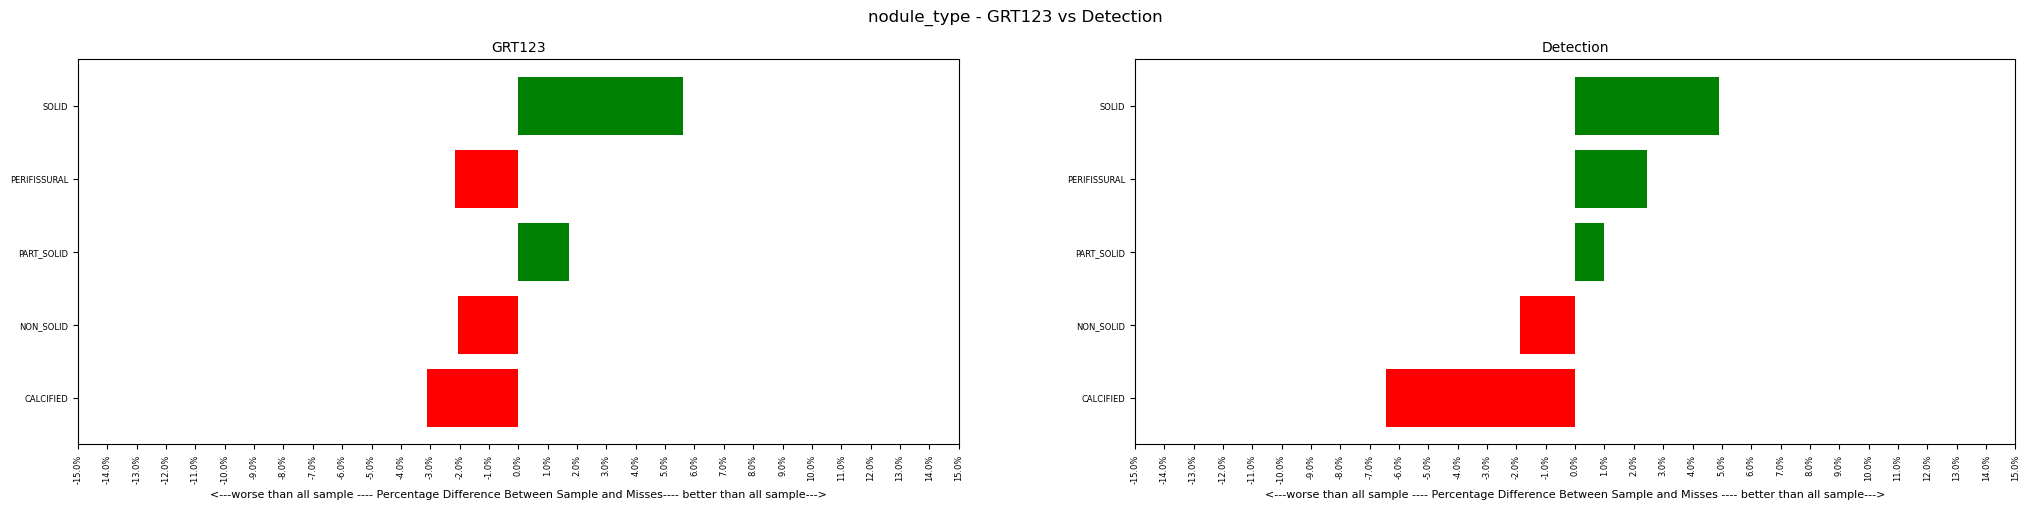

,nodule_type_all,nodule_type_miss,difference
CALCIFIED,6.95%,10.06%,-3.12%
NON_SOLID,7.35%,9.42%,-2.07%
PART_SOLID,5.14%,3.43%,1.71%
PERIFISSURAL,50.96%,53.10%,-2.15%
SOLID,29.61%,23.98%,5.62%


,nodule_type_all,nodule_type_miss,difference
CALCIFIED,6.95%,13.39%,-6.44%
NON_SOLID,7.35%,9.23%,-1.87%
PART_SOLID,5.14%,4.17%,0.97%
PERIFISSURAL,50.96%,48.51%,2.44%
SOLID,29.61%,24.70%,4.90%


********************************************************************************
nodule_lung_rads
********************************************************************************


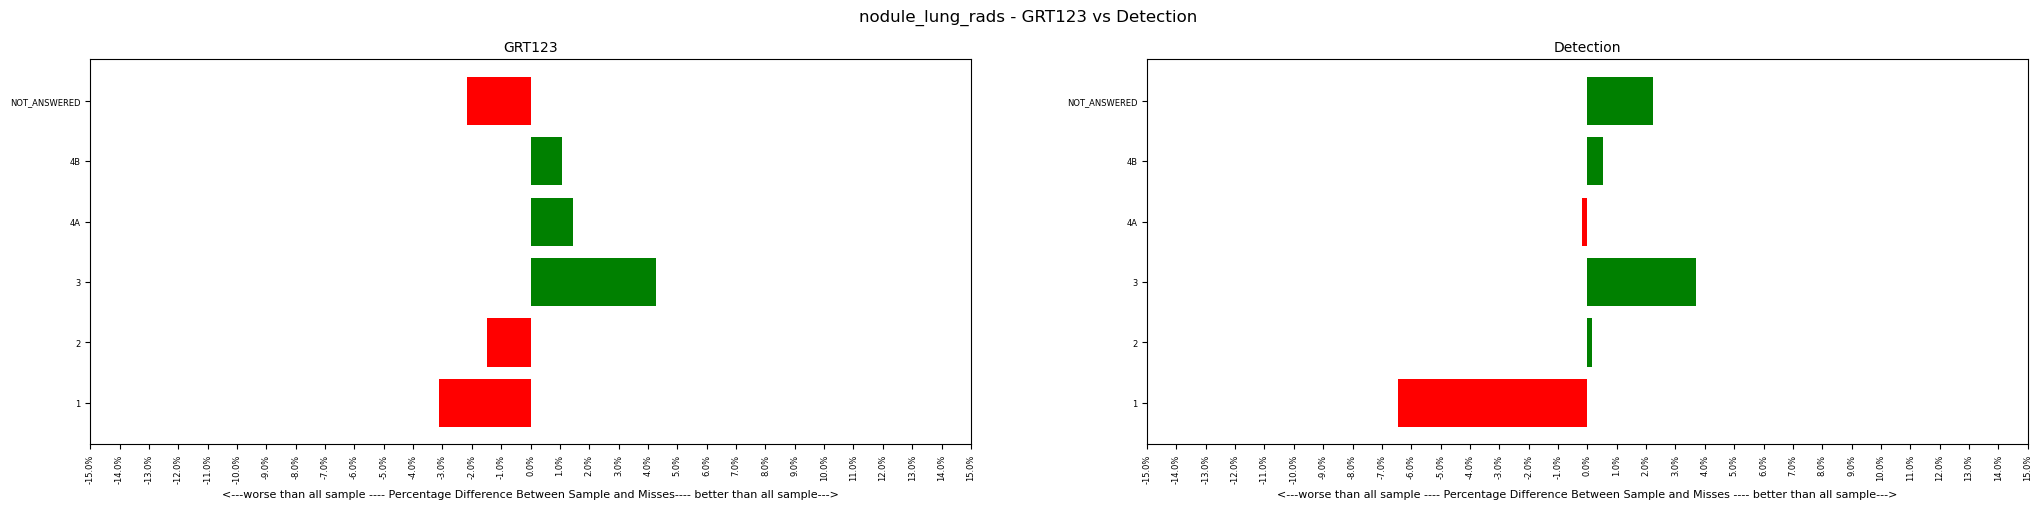

,nodule_lung_rads_all,nodule_lung_rads_miss,difference
1,6.95%,10.06%,-3.12%
2,16.52%,17.99%,-1.47%
3,15.61%,11.35%,4.26%
4A,7.85%,6.42%,1.43%
4B,1.71%,0.64%,1.07%
NOT_ANSWERED,51.36%,53.53%,-2.17%


,nodule_lung_rads_all,nodule_lung_rads_miss,difference
1,6.95%,13.39%,-6.44%
2,16.52%,16.37%,0.15%
3,15.61%,11.90%,3.70%
4A,7.85%,8.04%,-0.18%
4B,1.71%,1.19%,0.52%
NOT_ANSWERED,51.36%,49.11%,2.25%


********************************************************************************
nodule_site
********************************************************************************


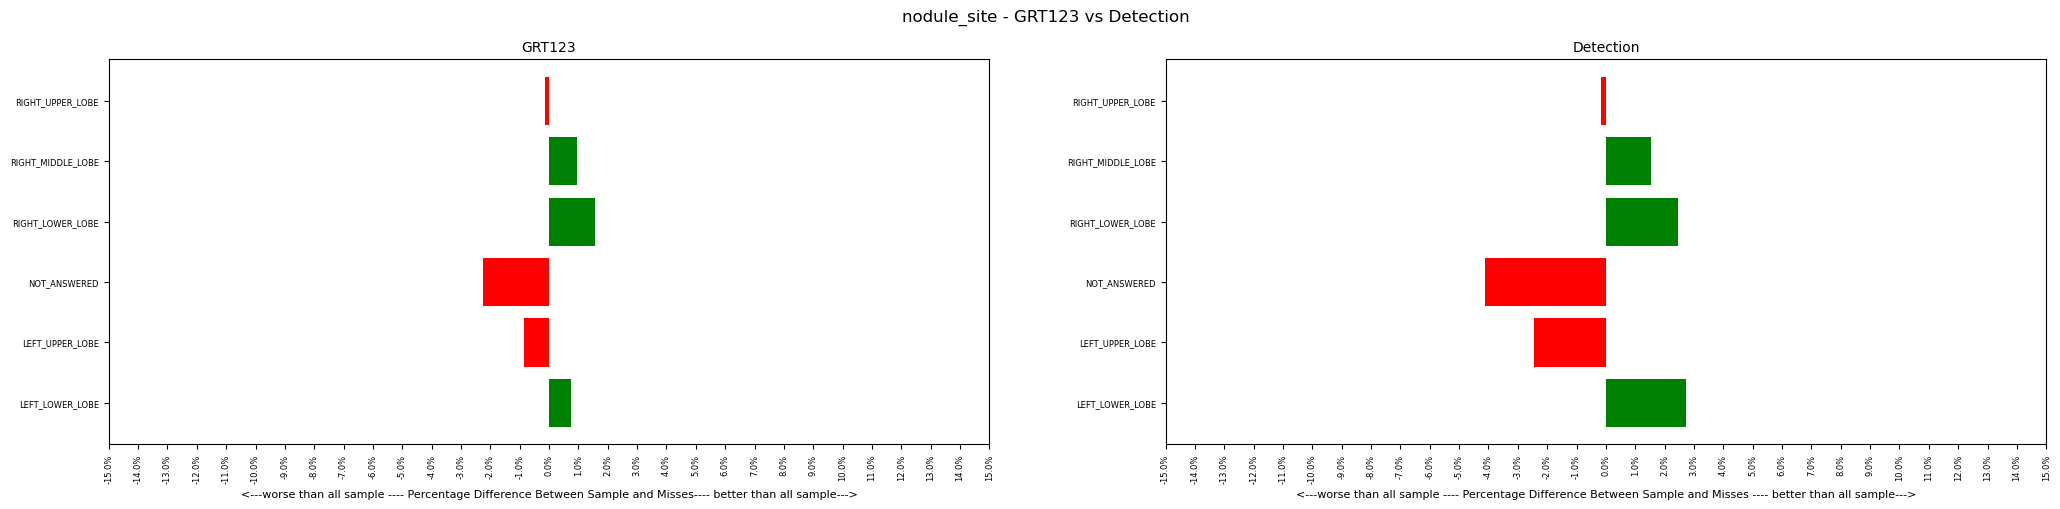

,nodule_site_all,nodule_site_miss,difference
LEFT_LOWER_LOBE,17.02%,16.27%,0.75%
LEFT_UPPER_LOBE,15.41%,16.27%,-0.87%
NOT_ANSWERED,17.02%,19.27%,-2.25%
RIGHT_LOWER_LOBE,19.13%,17.56%,1.58%
RIGHT_MIDDLE_LOBE,8.66%,7.71%,0.95%
RIGHT_UPPER_LOBE,22.76%,22.91%,-0.15%


,nodule_site_all,nodule_site_miss,difference
LEFT_LOWER_LOBE,17.02%,14.29%,2.73%
LEFT_UPPER_LOBE,15.41%,17.86%,-2.45%
NOT_ANSWERED,17.02%,21.13%,-4.11%
RIGHT_LOWER_LOBE,19.13%,16.67%,2.47%
RIGHT_MIDDLE_LOBE,8.66%,7.14%,1.52%
RIGHT_UPPER_LOBE,22.76%,22.92%,-0.16%


********************************************************************************
management_plan
********************************************************************************


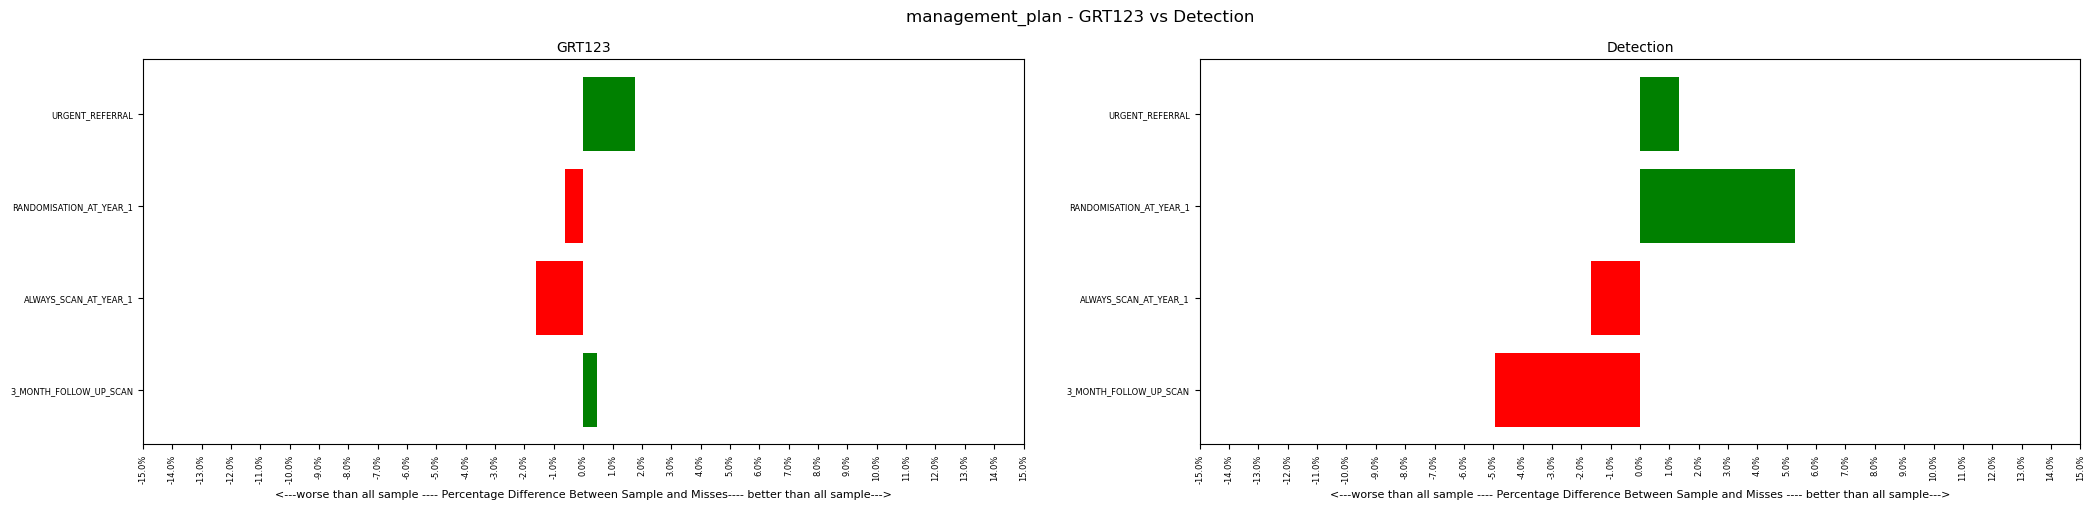

,management_plan_all,management_plan_miss,difference
3_MONTH_FOLLOW_UP_SCAN,28.10%,27.62%,0.47%
ALWAYS_SCAN_AT_YEAR_1,6.95%,8.57%,-1.62%
RANDOMISATION_AT_YEAR_1,62.13%,62.74%,-0.61%
URGENT_REFERRAL,2.82%,1.07%,1.75%


,management_plan_all,management_plan_miss,difference
3_MONTH_FOLLOW_UP_SCAN,28.10%,33.04%,-4.94%
ALWAYS_SCAN_AT_YEAR_1,6.95%,8.63%,-1.68%
RANDOMISATION_AT_YEAR_1,62.13%,56.85%,5.29%
URGENT_REFERRAL,2.82%,1.49%,1.33%


In [9]:
import matplotlib.pyplot as plt

grt123_misses['nodule_diameter_bins'] = pd.cut(grt123_misses.nodule_diameter_mm,
                                        bins=[0, 4, 30, np.inf],
                                        labels=['micro-nodules','nodules','masses']
                                    )

detection_misses['nodule_diameter_bins'] = pd.cut(detection_misses.nodule_diameter_mm,
                                        bins=[0, 4, 30, np.inf],
                                        labels=['micro-nodules','nodules','masses']
                                        )

categorical_variables_to_investigate = ['nodule_type','nodule_lung_rads','nodule_site','management_plan']
for var in categorical_variables_to_investigate:

    print('*'*80)
    print(var)
    print('*'*80)

    x = (
        pd.DataFrame(grt123_misses[var].value_counts(normalize=True)).merge(
        pd.DataFrame(grt123_misses[grt123_misses.miss][var].value_counts(normalize=True)),
        how='outer',
        left_index=True,
        right_index=True,
        suffixes=('_all','_miss')
        ).assign(difference=lambda df: df[var+'_all'] - df[var+'_miss']).applymap(lambda x: f'{x:.2%}')
    ).sort_index()

    y = (
        pd.DataFrame(detection_misses[var].value_counts(normalize=True)).merge(
        pd.DataFrame(detection_misses[detection_misses.miss][var].value_counts(normalize=True)),
        how='outer',
        left_index=True,
        right_index=True,
        suffixes=('_all','_miss')
        ).assign(difference=lambda df: df[var+'_all'] - df[var+'_miss']).applymap(lambda x: f'{x:.2%}')
    ).sort_index()

    fig, ax = plt.subplots(1, 2, figsize=(25,5))

    # Set the color of bars with negative values to red
    ax[0].barh(x.index, x['difference'].str.rstrip('%').astype(float), color=['red' if val < 0 else 'green' for val in x['difference'].str.rstrip('%').astype(float)], label='All')
    ax[1].barh(y.index, y['difference'].str.rstrip('%').astype(float), color=['red' if val < 0 else 'green' for val in y['difference'].str.rstrip('%').astype(float)], label='All')

    # Reduce the font size of the y-axis labels
    ax[0].tick_params(axis='y', labelsize=6)
    ax[1].tick_params(axis='y', labelsize=6)

    ax[0].set_xticks(np.arange(-15,16,1))
    ax[1].set_xticks(np.arange(-15,16,1))

    ax[0].set_xticklabels([f'{x:.1f}%' for x in np.arange(-15,16,1)], fontsize=6, rotation=90)
    ax[1].set_xticklabels([f'{x:.1f}%' for x in np.arange(-15,16,1)], fontsize=6, rotation=90)

    # Add text label below x-axis
    ax[0].set_xlabel('<---worse than all sample ---- Percentage Difference Between Sample and Misses---- better than all sample--->', fontsize=8)
    ax[1].set_xlabel('<---worse than all sample ---- Percentage Difference Between Sample and Misses ---- better than all sample--->', fontsize=8)

    ax[0].set_title('GRT123', fontsize=10)
    ax[1].set_title('Detection', fontsize=10)

    plt.suptitle(f'{var} - GRT123 vs Detection', fontsize=12)
    plt.show()

    display(x)
    display(y)
